## 1. Example where bucketing makes information more clear

In this scenario, we'll show that the likelihood of something occuring decreases with respect to age, but it is more prevalent in adults than children.

In [1]:
import pandas as pd
import random
import uuid

N=10000
K=int(N*.9)
A=N-K
NORM_WEIGHT=.1

kids = pd.DataFrame({
    # Not a safe uuid, but OK for our example
    'subject_id': [str(uuid.uuid1()).split('-')[0] for _ in range(K)],
    'age': [int(random.uniform(12, 18)) for _ in range(K)],
    'age_category': ['child']*K,
    'ran': random.choices([False, True], weights=[1-NORM_WEIGHT,NORM_WEIGHT], k=K)
})

adults = pd.DataFrame({
    # Not a safe uuid, but OK for our example
    'subject_id': [str(uuid.uuid1()).split('-')[0] for _ in range(A)],
    'age': [int(random.uniform(18, 68)) for _ in range(A)],
    'age_category': ['adult']*A,
    'ran': random.choices([False, True], weights=[1-NORM_WEIGHT,NORM_WEIGHT], k=A)
})


In [2]:
runners = pd.concat([kids,adults])

In [3]:
rates = runners.groupby('age')['ran'].sum() / runners.groupby('age')['ran'].count()

<Axes: xlabel='age'>

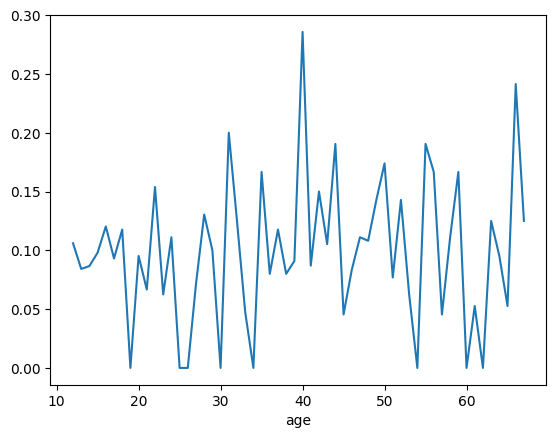

In [4]:
rates.plot()

In [5]:
NINE_WEIGHT=.3

adults['ran'] = adults['age'].apply(lambda x: 
    random.choices([False, True], weights=[NINE_WEIGHT+(x/7000), 1-(NINE_WEIGHT+(x/7000))], k=1)[0] if x%10 == 9 else
    random.choices([False, True], weights=[(1-NORM_WEIGHT)+(x/700), 1-((1-NORM_WEIGHT)+(x/700))], k=1)[0])

<Axes: xlabel='age'>

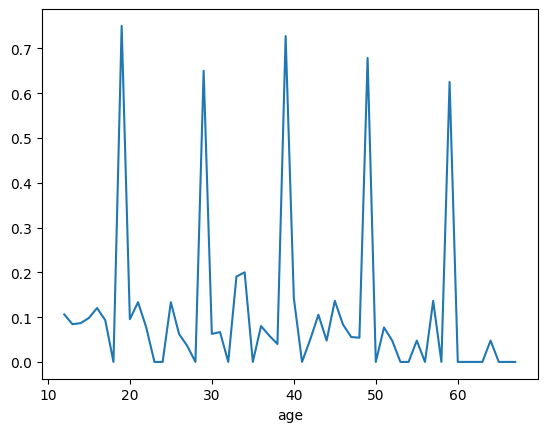

In [6]:
runners = pd.concat([kids,adults])
rates = runners.groupby('age')['ran'].sum() / runners.groupby('age')['ran'].count()
rates.plot()

<Axes: xlabel='age_category'>

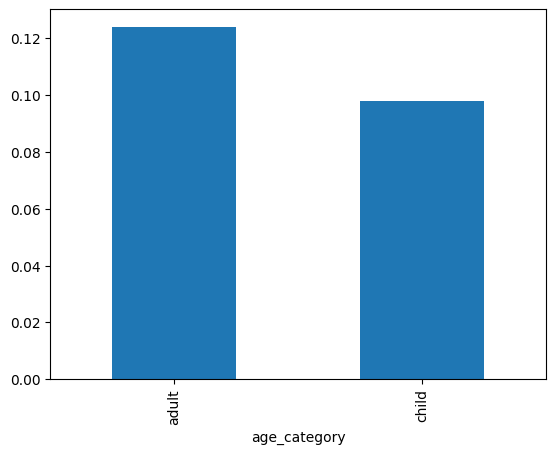

In [7]:
rates = runners.groupby('age_category')['ran'].sum() / runners.groupby('age_category')['ran'].count()
rates.plot.bar()